In [37]:
import os
raw_audio = dict()


directory = 'D:/mainproject/babycrydata/hungry'
for filename in os.listdir(directory):
    if filename.endswith(".wav"): 
        raw_audio[os.path.join(directory, filename)] = 'hungry'
    else:
        continue

directory = 'D:/mainproject/babycrydata/pain'
for filename in os.listdir(directory):
    if filename.endswith(".wav"): 
        raw_audio[os.path.join(directory, filename)] = 'pain'
    else:
        continue
        
directory = 'D:/mainproject/babycrydata/discomfort'
for filename in os.listdir(directory):
    if filename.endswith(".wav"): 
        raw_audio[os.path.join(directory, filename)] = 'discomfort'
    else:
        continue

directory = 'D:/mainproject/babycrydata/tired'
for filename in os.listdir(directory):
    if filename.endswith(".wav"): 
        raw_audio[os.path.join(directory, filename)] = 'tired'
    else:
        continue


#print (raw_audio)

In [39]:
import librosa
audio_data = 'D:/mainproject/babycrydata/hungry/0a983cd2-0078-4698-a048-99ac01eb167a-1433917038889-1.7-f-04-hu.wav'
x , sr = librosa.load(audio_data)
import IPython.display as ipd
ipd.Audio(audio_data)


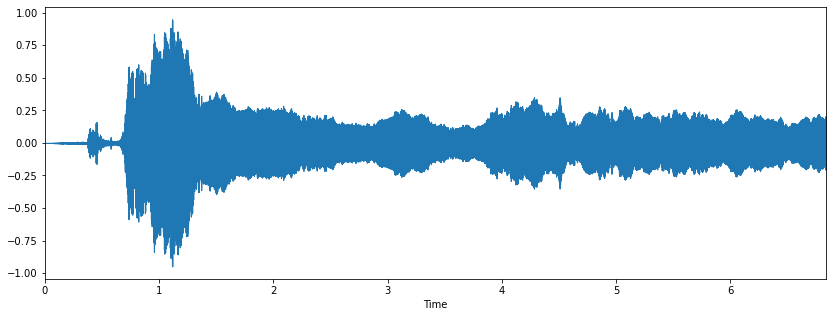

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

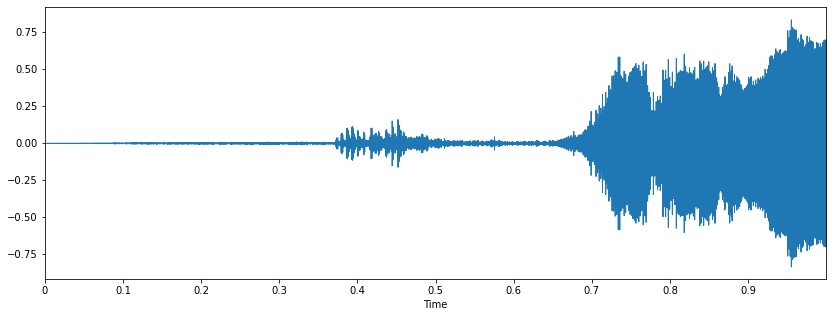

In [41]:
import librosa
audio_data = 'D:/mainproject/babycrydata/audio/hungry/hungry0a983cd2-0078-4698-a048-99ac01eb167a-1433917038889-1.7-f-04-hu.wavsnippet1.wav'
x , sr = librosa.load(audio_data)
import IPython.display as ipd
ipd.Audio(audio_data)
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


In [42]:
import pandas as pd
import librosa 
import numpy as np
'''Chop and Transform each track'''
X = pd.DataFrame(columns = np.arange(45), dtype = 'float32').astype(np.float32)
j = 0
k = 0
#l = 0
count=0
for i, filename in enumerate(os.listdir('D:/mainproject/babycrydata/audio/pain/')):
    last_number_frames = -1
    if filename.endswith(".wav"):
        #print (filename)
        audiofile, sr = librosa.load("D:/mainproject/babycrydata/audio/pain/" + filename)
        fingerprint = librosa.feature.mfcc(y=audiofile, sr=sr, n_mfcc=13)
        x = pd.DataFrame(fingerprint, dtype = 'float32')
        x[44] = 'pain'
        X.loc[i] = x.loc[0]
        j = i 
        count=count+1
for i, filename in enumerate(os.listdir('D:/mainproject/babycrydata/audio/hungry/')):
    if filename.endswith(".wav"):
        #print filename
        audiofile, sr = librosa.load("D:/mainproject/babycrydata/audio/hungry/" + filename)
        fingerprint = librosa.feature.mfcc(y=audiofile, sr=sr, n_mfcc=13)
        x = pd.DataFrame(fingerprint, dtype = 'float32')
        x[44] = 'hungry'
        X.loc[i+j] = x.loc[0] 
        k = i 
        count=count+1
for i, filename in enumerate(os.listdir('D:/mainproject/babycrydata/audio/discomfort/')):
    if filename.endswith(".wav"):
        #print filename
        audiofile, sr = librosa.load("D:/mainproject/babycrydata/audio/discomfort/" + filename)
        fingerprint = librosa.feature.mfcc(y=audiofile, sr=sr, n_mfcc=13)
        x = pd.DataFrame(fingerprint, dtype = 'float32')
        x[44] = 'discomfort'
        X.loc[i+j+k] = x.loc[0]




        
#Do something with missing values. you might want to do something more sophisticated with missing values later
X = X.fillna(0)
#print(count)

In [43]:
X.head()

0           1           2           3           4           5   \
0 -850.317139 -852.008850 -852.008850 -852.008850 -852.008850 -852.008850   
1 -709.096252 -702.621033 -680.724060 -665.714844 -643.530151 -597.495728   
2 -715.216736 -708.238403 -707.021301 -706.583740 -698.491821 -692.686768   
3 -451.678101 -476.885864 -494.641815 -465.201752 -442.064056 -433.867188   
4 -434.960358 -431.131592 -432.069855 -446.308655 -475.627777 -480.463257   

           6           7           8           9   ...          35  \
0 -852.008850 -852.008850 -852.008850 -852.008850  ... -625.902710   
1 -583.474304 -582.755676 -593.381714 -624.415344  ... -759.773804   
2 -692.701477 -693.114563 -704.256226 -721.227295  ... -703.726501   
3 -459.501892 -483.189484 -488.814362 -474.592255  ... -480.836670   
4 -466.597382 -458.207245 -462.990845 -455.482727  ... -328.928955   

           36          37          38          39          40          41  \
0 -609.206543 -558.989258 -556.160278 -578.153198 -579.574280 -604.941223   
1 -748.070740 -740.349854 -748.134583 -748.984314 -747.551880 -744.774353   
2 -679.044128 -653.907776 -609.711121 -560.088623 -535.683777 -515.615356   
3 -471.485016 -474.537140 -507.281860 -520.139771 -519.343567 -530.151794   
4 -329.243011 -329.164948 -335.017822 -326.279785 -316.222473 -312.833649   

           42          43    44  
0 -669.555603 -682.124329  pain  
1 -744.210510 -753.023315  pain  
2 -496.066223 -466.901672  pain  
3 -478.971832 -435.418030  pain  
4 -272.880341 -241.261429  pain  

[5 rows x 45 columns]

In [44]:
type(X)

pandas.core.frame.DataFrame

In [45]:
from sklearn.model_selection import train_test_split

y = X[44]
del X[44]
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [46]:
#print(y)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
accuracy_score(y_test,y_pred_test)
#forest.score(X_test,y_test)

0.8905109489051095

In [13]:
import pickle

model = RandomForestClassifier()
model.fit(X_train, y_train)
filename = 'D:/mainproject/babycrydata/models/myRandomForest.pkl'
pickle.dump(model, open(filename, 'wb'))

In [14]:
model = pickle.load(open(filename, 'rb'))